In [ ]:
import pandas as pd
import warnings as wr
wr.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df.Gender = le.fit_transform(df[['Gender']])
X = df[['Gender', 'Height']]
y = df['Weight']

In [ ]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [ ]:
df.tail()

,Gender,Height,Weight
8550,0,60.483946,110.565497
8551,0,63.423372,129.921671
8552,0,65.584057,155.942671
8553,0,67.429971,151.678405
8554,0,60.921791,131.253738


# Go Ahead

# EDA

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size=.70, random_state=42)

In [ ]:
train.shape

(5988, 3)

In [ ]:
test.shape

(2567, 3)

In [ ]:
test.head

<bound method NDFrame.head of       Gender     Height      Weight
6006       0  64.846644  149.668369
1197       1  68.886367  197.642244
2862       1  70.963369  178.551191
6497       0  62.737189  141.343095
2860       1  69.578030  195.322675
...      ...        ...         ...
184        1  71.935887  202.046425
2988       1  67.616383  165.955953
6048       0  58.213614   98.869253
420        1  69.689795  190.933401
5669       0  64.997610  123.868429

[2567 rows x 3 columns]>

In [ ]:
train.head

<bound method NDFrame.head of       Gender     Height      Weight
553        1  67.594031  186.751417
1397       1  71.601697  211.031652
7934       0  62.625985  143.768451
8367       0  66.136131  151.814648
3320       1  71.843308  196.505814
...      ...        ...         ...
5734       0  63.349988  139.223151
5191       0  58.861625   90.728561
5390       0  64.325406  156.800504
860        1  69.074492  179.386817
7270       0  67.588840  150.380597

[5988 rows x 3 columns]>

In [ ]:
testing, validation = train_test_split(test,train_size=.50, random_state=42) #15% test, 15% val and rest 70% is train

In [ ]:
testing.shape

(1283, 3)

In [ ]:
validation.shape

(1284, 3)

In [ ]:
df.shape

(8555, 3)

In [ ]:
train.shape

(5988, 3)

In [ ]:
# copy df

In [ ]:
df2 = df.copy()

In [ ]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [ ]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [ ]:
df['Weight'].value_counts()

Weight
241.893563    1
134.228371    1
162.413463    1
103.274544    1
137.904633    1
             ..
196.619820    1
187.027828    1
196.249698    1
225.797525    1
131.253738    1
Name: count, Length: 8555, dtype: int64

In [ ]:
#drop duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(8555, 3)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

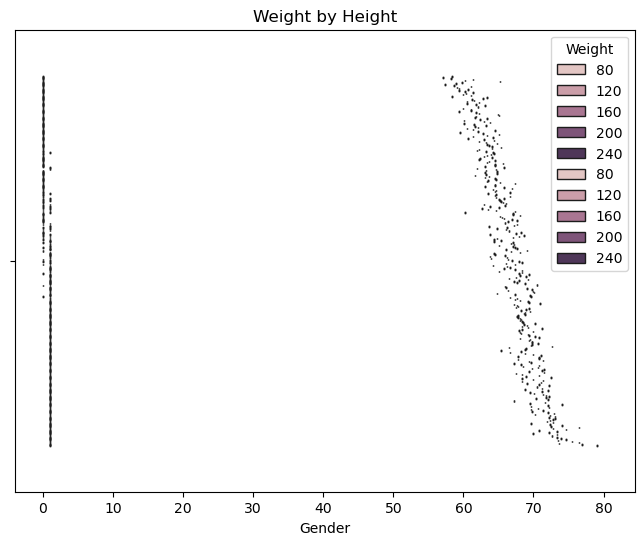

In [ ]:
plt.figure(figsize=(8,6))

sns.boxplot(x='Gender', hue='Weight', data=df)
plt.title('Weight by Gender')

sns.boxplot(x='Height', hue='Weight', data=df)
plt.title('Weight by Height')

plt.show()

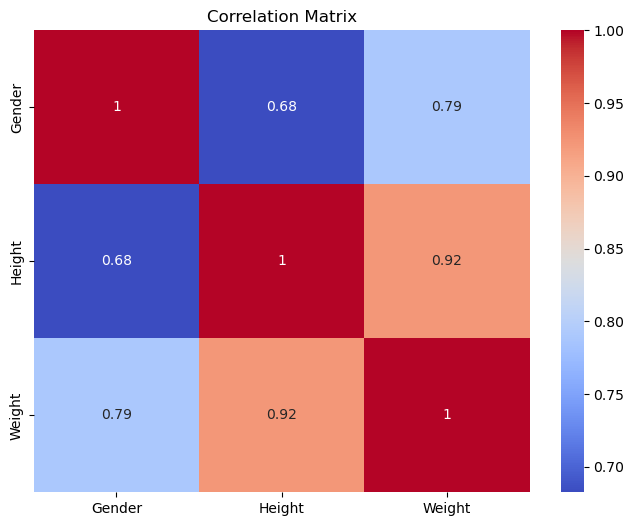

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Regression Problem

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predictions on training and testing set
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
train_r2_lr = r2_score(y_train, y_train_pred_lr)
test_r2_lr = r2_score(y_test, y_test_pred_lr)

# Calculate Mean Squared Error on test set
test_mse_lr = mean_squared_error(y_test, y_test_pred_lr)

print("\nLinear Regression Model Performance:")
print(f"Training R^2 Score: {train_r2_lr:.4f}")
print(f"Testing R^2 Score: {test_r2_lr:.4f}")
print(f"Testing Mean Squared Error (MSE): {test_mse_lr:.4f}")


Linear Regression Model Performance:
Training R^2 Score: 0.8974
Testing R^2 Score: 0.9059
Testing Mean Squared Error (MSE): 96.8373


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)  # Default k=5

# Train the KNN model on training data
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
# Predictions on training and testing set
y_train_pred_knn = knn_model.predict(X_train)
y_test_pred_knn = knn_model.predict(X_test)

In [ ]:
train_r2_knn = r2_score(y_train, y_train_pred_knn)
test_r2_knn = r2_score(y_test, y_test_pred_knn)
test_mse_knn = mean_squared_error(y_test, y_test_pred_knn)

print("\nKNN Regression Model Performance:")
print(f"Training R^2 Score: {train_r2_knn:.4f}")
print(f"Testing R^2 Score: {test_r2_knn:.4f}")
print(f"Testing Mean Squared Error (MSE): {test_mse_knn:.4f}")


KNN Regression Model Performance:
Training R^2 Score: 0.9172
Testing R^2 Score: 0.8821
Testing Mean Squared Error (MSE): 121.3353


# Comparison of Linear Regression and KNN Regressor

In [ ]:
# Comparing the performance of Linear Regression and KNN Regression
print("\nModel Performance on Test Data:")
print("-" * 40)
print(f"{'Model':<20} {'R² Score':<10} {'MSE':<10}")
print("-" * 40)
print(f"{'Linear Regression':<20} {test_r2_lr:.4f}     {test_mse_lr:.4f}")
print(f"{'KNN Regression':<20} {test_r2_knn:.4f}     {test_mse_knn:.4f}")


Model Performance on Test Data:
----------------------------------------
Model                R² Score   MSE       
----------------------------------------
Linear Regression    0.9059     96.8373
KNN Regression       0.8821     121.3353


In [ ]:
# plot

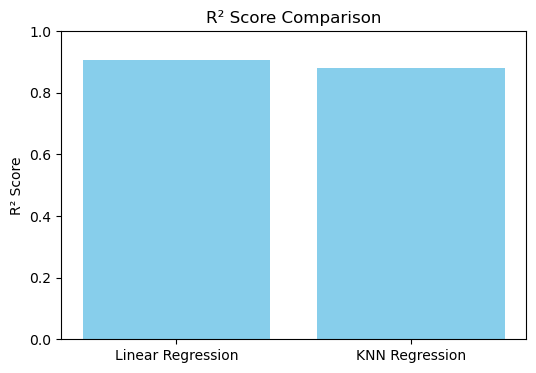

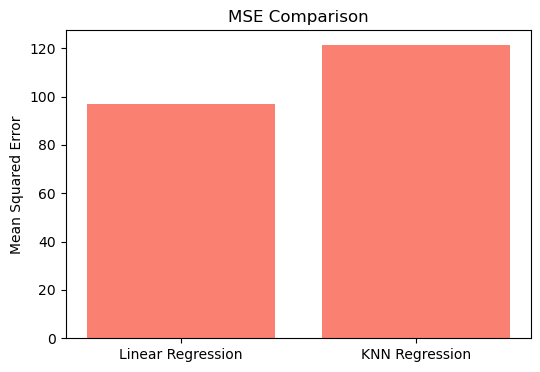

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ['Linear Regression', 'KNN Regression']

# Scores
r2_scores = [test_r2_lr, test_r2_knn]
mses = [test_mse_lr, test_mse_knn]

# Plot R² scores
plt.figure(figsize=(6, 4))
plt.bar(models, r2_scores, color='skyblue')
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.show()

# Plot MSE
plt.figure(figsize=(6, 4))
plt.bar(models, mses, color='salmon')
plt.title('MSE Comparison')
plt.ylabel('Mean Squared Error')
plt.show()

# Classification Problem

In [ ]:
# Separating X and y (target = 'Gender')
X = df2.drop(columns=['Gender'])
y = df2['Gender']

In [ ]:
df2.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
# Evaluate model accuracy
knn_acc = accuracy_score(y_test, y_pred_knn)
print(f"KNN Classifier Accuracy: {knn_acc:.4f}")

KNN Classifier Accuracy: 0.9042


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
logreg_acc = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {logreg_acc:.4f}")

Logistic Regression Accuracy: 0.9186


# Comparision of Logistic Regression and KNN Classifier accuracy

In [ ]:
# Comparing accuracy
if knn_acc > logreg_acc:
    print("KNN performs better than Logistic Regression.")
elif knn_acc < logreg_acc:
    print("Logistic Regression performs better than KNN.")
else:
    print("Both models have the same accuracy.")

Logistic Regression performs better than KNN.


In [ ]:
# plot

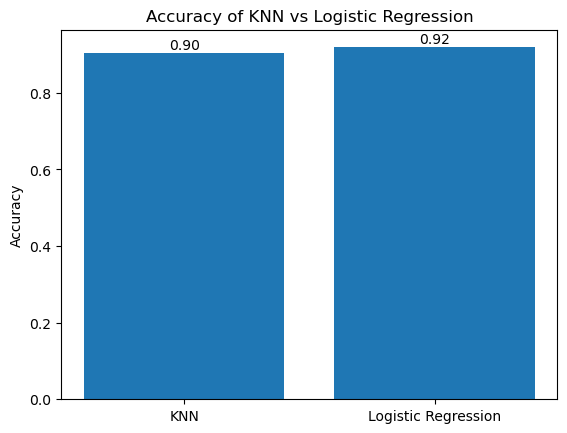

In [ ]:
import matplotlib.pyplot as plt

# Model names and their accuracy values
model_names = ['KNN', 'Logistic Regression']
accuracy_values = [knn_acc, logreg_acc]  # Make sure these values are defined earlier

# Create the bar chart
plt.bar(model_names, accuracy_values)

# Add labels and title
plt.ylabel('Accuracy')
plt.title('Accuracy of KNN vs Logistic Regression')

# Show the accuracy value above each bar
for i in range(len(model_names)):
    plt.text(i, accuracy_values[i] + 0.01, f"{accuracy_values[i]:.2f}", ha='center')

# Show the chart
plt.show()